In [2]:
import pandas as pd

file_path = r"C:\Users\Administrator\Downloads\Eating out habit-1 (1).xlsx"
data = pd.read_excel(file_path)

data.head()

C:\Users\Administrator\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,X1,X2,X3,X4,X5a,X5b,X5c,X5d,X5e,X6,...,X9k,X9l,X9m,X9n,X9o,X10,X11,X12,X13,X14
0,2,1,3,5,0,0,0,1,0,3,...,3,3,4,4,4,4,1,1,2,1
1,2,1,3,5,0,0,1,0,0,3,...,3,3,4,3,3,4,1,2,3,1
2,2,4,4,2,1,0,0,0,0,3,...,2,4,4,3,4,2,1,1,1,2
3,1,1,3,4,0,0,1,0,0,2,...,3,3,2,2,4,4,2,2,5,1
4,1,2,3,3,0,0,0,1,0,2,...,4,3,4,2,3,4,1,2,2,1


In [4]:
data.describe()

,X1,X2,X3,X4,X5a,X5b,X5c,X5d,X5e,X6,...,X9k,X9l,X9m,X9n,X9o,X10,X11,X12,X13,X14
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.00000,76.000000,76.000000
mean,1.697368,2.000000,3.289474,3.250000,0.368421,0.197368,0.342105,0.407895,0.039474,2.526316,...,2.289474,2.513158,2.855263,2.394737,2.526316,2.184211,1.223684,1.25000,1.789474,1.302632
std,1.006906,1.232883,0.861252,1.506652,0.485582,0.400657,0.477567,0.494709,0.196013,0.621261,...,0.949607,0.945070,0.933866,0.817785,1.064252,0.890102,0.419482,0.43589,0.899122,0.462450
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.00000,1.000000,1.000000
50%,1.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,2.000000,2.500000,3.000000,2.000000,2.000000,2.000000,1.000000,1.00000,2.000000,1.000000
75%,2.000000,2.000000,4.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,...,3.000000,3.000000,4.000000,3.000000,3.000000,2.250000,1.000000,1.25000,2.000000,2.000000
max,4.000000,5.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.00000,5.000000,2.000000


In [5]:
data['X1'].value_counts()  # Eating frequency
data['X2'].value_counts()  # Type of eatery

X2
1    34
2    25
5     6
3     6
4     5
Name: count, dtype: int64

In [6]:
# Correlation between spending and frequency of eating out
correlation = data[['X1', 'X4']].corr()
print(correlation)

          X1        X4
X1  1.000000  0.217526
X4  0.217526  1.000000


In [7]:
from sklearn.linear_model import LinearRegression
X = data[['X1', 'X2', 'X10']]  # Frequency, type of eatery, age
y = data['X4']  # Weekly spending

# Linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [ 0.42982844 -0.35718604  0.28959017]
Intercept: 2.602268961624657


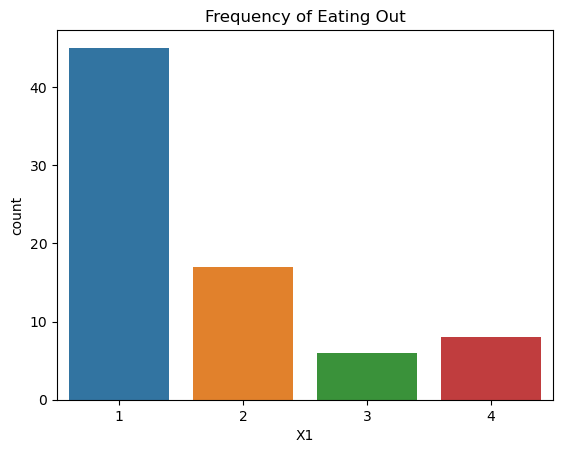

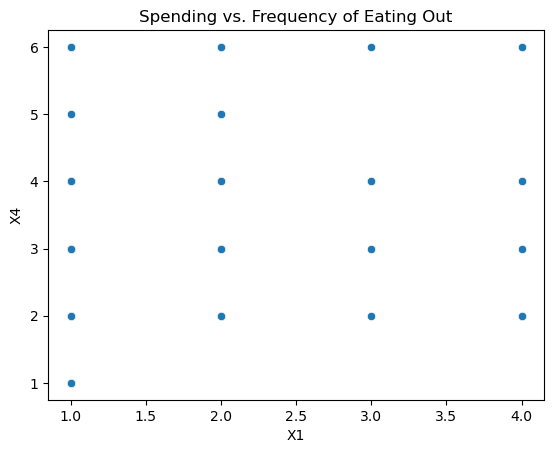

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for frequency of eating out
sns.countplot(x='X1', data=data)
plt.title('Frequency of Eating Out')
plt.show()

# Scatter plot for spending vs. frequency of eating out
sns.scatterplot(x='X1', y='X4', data=data)
plt.title('Spending vs. Frequency of Eating Out')
plt.show()

In [9]:
# Ranking analysis
ranking_columns = ['X8a', 'X8b', 'X8c', 'X8d', 'X8e', 'X8f']
data[ranking_columns].mean().sort_values()

X8a    1.592105
X8b    3.184211
X8c    3.697368
X8e    3.776316
X8d    4.013158
X8f    4.750000
dtype: float64

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

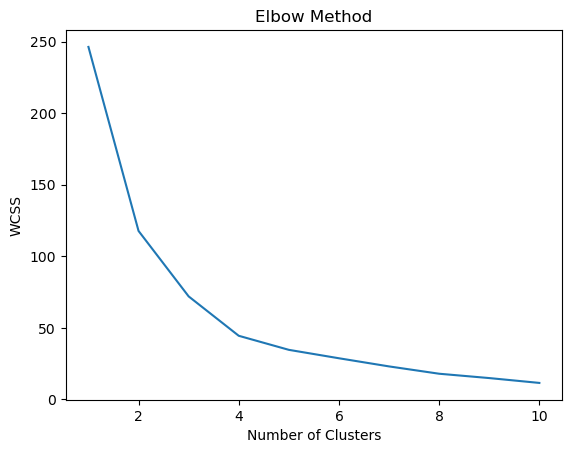

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[1.61538462 4.92307692]
 [1.15789474 2.13157895]
 [3.58333333 3.16666667]]


In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering (frequency of eating out and spending)
X = data[['X1', 'X4']]

# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Clustering using KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Adding cluster labels to the dataset
data['Cluster'] = clusters

# Analyze cluster centers
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

In [11]:
from scipy.stats import chi2_contingency

# Cross-tabulation between frequency of eating out and profession
contingency_table = pd.crosstab(data['X1'], data['X13'])

# Performing Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 10.983143388074184
P-value: 0.27686614336249926


In [12]:
from sklearn.decomposition import FactorAnalysis

# Select variables related to decision-making (X9a to X9o)
decision_factors = data[['X9a', 'X9b', 'X9c', 'X9d', 'X9e', 'X9f', 'X9g', 'X9h', 'X9i', 'X9j', 'X9k', 'X9l', 'X9m', 'X9n', 'X9o']]

# Performing Factor Analysis
fa = FactorAnalysis(n_components=3, random_state=42)
fa.fit(decision_factors)

# Displaying factor loadings
loadings = pd.DataFrame(fa.components_, columns=decision_factors.columns)
print(loadings)

        X9a       X9b       X9c       X9d       X9e       X9f       X9g  \
0  0.152673  0.560804  0.741315  0.511737  0.065267 -0.078202 -0.001436   
1  0.206313 -0.131670 -0.149106 -0.102325  0.456334  0.084435  0.001872   
2 -0.098761  0.157508 -0.191855  0.027218 -0.110562  0.110283  0.128878   

        X9h       X9i       X9j       X9k       X9l       X9m       X9n  \
0  0.250031  0.448349  0.349551  0.016550  0.194206  0.142255  0.076130   
1  0.190285  0.184176  0.166701 -0.010891  0.025143  0.157594  0.165465   
2  0.503941  0.275694  0.392989  0.227911  0.113799  0.026702 -0.035790   

        X9o  
0  0.499258  
1  0.034777  
2  0.272976  


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

# Categorizing spending into low, medium, and high
data['Spending_Category'] = pd.cut(data['X4'], bins=[0, 600, 1200, 2000], labels=['Low', 'Medium', 'High'])

# Selecting features and target variable
X = data[['X1', 'X2', 'X10', 'X13']]  # Frequency, type of eatery, age, profession
y = data['Spending_Category']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


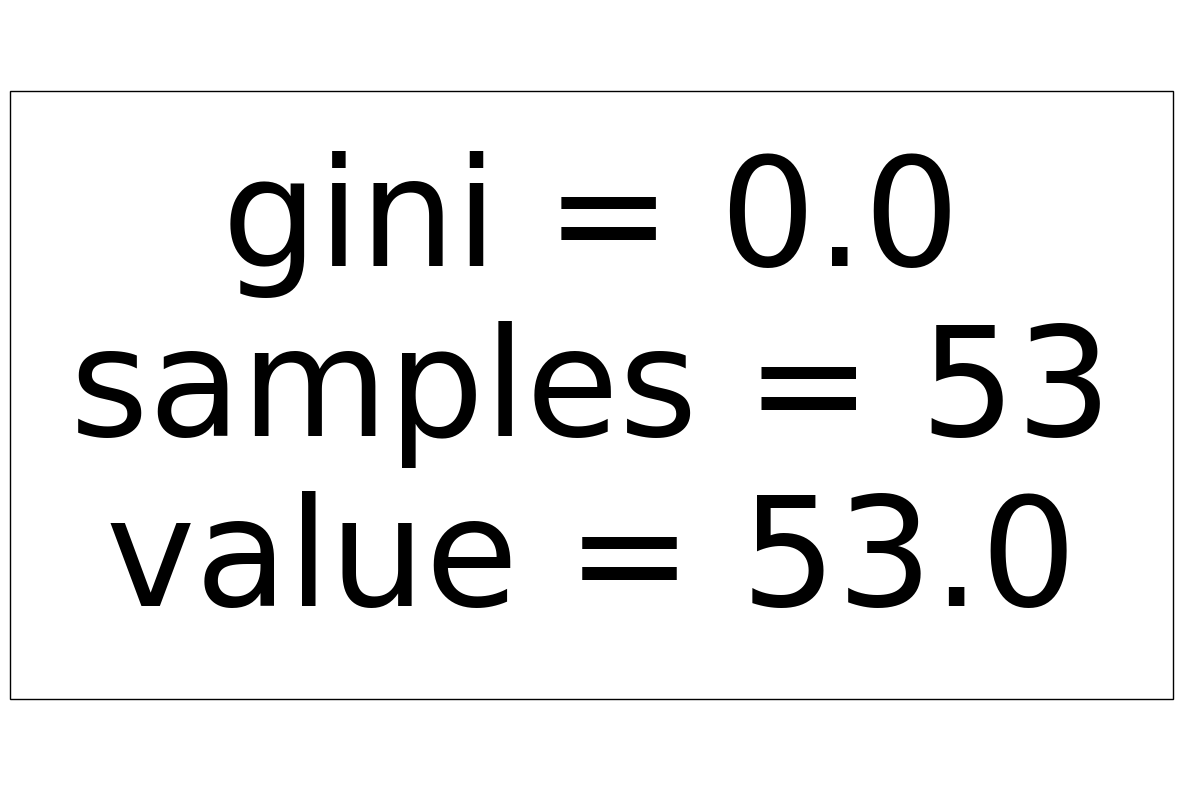

In [26]:
# Converting the feature names (index) to a list
feature_names = X.columns.tolist()

# Visualizing the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=['Low', 'Medium', 'High'])
plt.show()

In [16]:
# One-way ANOVA: Spending across different professions
from scipy import stats
profession_groups = data.groupby('X13')['X4']
f_val, p_val = stats.f_oneway(*(group for name, group in profession_groups))
print(f"ANOVA F-value: {f_val}, P-value: {p_val}")

ANOVA F-value: 1.910599937830277, P-value: 0.13550783150472237


In [17]:
# Relationship between preferred eateries and profession
contingency_table = pd.crosstab(data['X2'], data['X13'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-value: {p}")

Chi-Square Statistic: 20.70533531059483, P-value: 0.054865467675160824


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

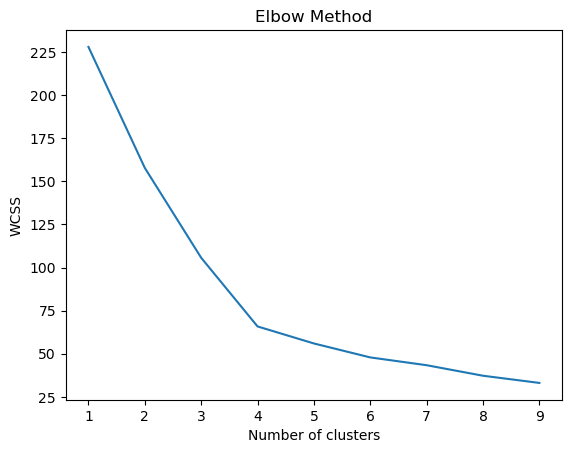

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


               X1        X4        X2
Cluster                              
0        1.285714  3.367347  1.346939
1        1.230769  2.461538  4.230769
2        3.571429  3.571429  2.214286
            0         1         2
X9a  0.178165  0.565875 -0.105016
X9b  0.625566 -0.016770  0.124977
X9c  0.735118  0.125284 -0.136308
X9d  0.704624  0.066281 -0.124158
X9e -0.142570  0.855383  0.019396
X9f -0.197560  0.030013  0.345263
X9g -0.049446 -0.088635  0.357810
X9h  0.331495  0.157705  0.531665
X9i  0.506244  0.288660  0.447157
X9j  0.425016  0.186713  0.419186
X9k  0.018404 -0.027681  0.272673
X9l  0.292576  0.120264 -0.042732
X9m  0.104020  0.246224  0.063890
X9n  0.062008  0.244098 -0.007227
X9o  0.469533  0.152923  0.256454


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cluster Analysis
# Select variables and preprocess
cluster_vars = ['X1', 'X4', 'X2']
X = data[cluster_vars].dropna()
X_scaled = StandardScaler().fit_transform(X)

# Determine optimal clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

# Analyze clusters
cluster_analysis = data.groupby('Cluster')[cluster_vars].mean()
print(cluster_analysis)

# Factor Analysis
fa_vars = ['X9a', 'X9b', 'X9c', 'X9d', 'X9e', 'X9f', 'X9g', 'X9h', 'X9i', 'X9j', 'X9k', 'X9l', 'X9m', 'X9n', 'X9o']
fa_data = data[fa_vars].dropna()

# KMO and Bartlett's Test
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
kmo_all, kmo_model = calculate_kmo(fa_data)
chi_square_value, p_value = calculate_bartlett_sphericity(fa_data)

# Perform Factor Analysis
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(fa_data)

# Get Loadings
loadings = pd.DataFrame(fa.loadings_, index=fa_vars)
print(loadings)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare the features (X) and target (y)
X = data[['X1', 'X2', 'X10', 'X13']]  # Frequency, type of eatery, age, profession
y = data['Spending_Category']  # Low, Medium, High spending categories

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix to evaluate classification performance
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[23]]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Features and target
X = data[['X1', 'X2', 'X10', 'X13']]  # Frequency, type of eatery, age, profession
y = data['Spending_Category']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {accuracy_log}')
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_log))

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

# Support Vector Machine (SVM) Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Low'

In [30]:
print(data['Spending_Category'].value_counts())

Spending_Category
Low       76
Medium     0
High       0
Name: count, dtype: int64


In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)